# 타이타닉 EDA 필사
---

## 목차 및 개요
* Q1 : 컬럼 정의 - 각 컬럼과 그 자료형을 설명해주세요
* Q2 : 결측치와 이상치 제거 - 필요하지 않은 데이터, 결측치, 이상치를 찾고 제거해주세요
* Q3 : 개별 특성 파악 - 다양한 방식의 그래프로, 개별 특성을 파악하고 시각화해주세요
* Q4 : 특성간 상관관계 분석 (2점) - 다양한 방식의 그래프로, 연관 특성을 찾아주세요
---

## Q1. 칼럼 정의

In [131]:
import pandas as pd

x_test = pd.read_csv("https://raw.githubusercontent.com/NeatyNut/csv/main/titanic_test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/NeatyNut/csv/main/gender_submission.csv")
train = pd.read_csv("https://raw.githubusercontent.com/NeatyNut/csv/main/titanic_train.csv")

* 데이터의 대략적인 모양을 파악해보겠다.

In [132]:
x_test.shape, train.shape, y_test.shape

((418, 11), (891, 12), (418, 2))

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
print("숫자형 컬럼 개수 :", len(train.select_dtypes(exclude="object").columns))
print("문자형 컬럼 개수 :", len(train.select_dtypes(include="object").columns))

숫자형 컬럼 개수 : 7
문자형 컬럼 개수 : 5


### __숫자형 컬럼과 문자형 컬럼이 비슷한 숫자로 나뉘기 때문에 데이터 컬럼의 의미를 먼저 알아보자__

    - passengerId : 승객 ID / int
    - Survived : 생존 여부 / int(0/1)
    - Pclass : 승객등급 / int
    - Name : 이름 / string
    - Sex : 성별 / string
    - Age : 숫자 / float
    - SibSp : 함께 팁승한 형제자매, 배우자 수 / int
    - Parch : 함께 탑승한 부모, 자녀 수 / int
    - Ticket : 티켓 넘버 / string
    - Fare : 요금 / float
    - Cabin : 객실넘버 / string
    - Embarked : 탑승항구 / string

In [86]:
# 수치형 데이터 형태 알아보기
train.describe()

# 아이디 : 1 ~891
# 생존여부 : 0 또는 1
# 승객등급 : 1, 2, 3
# 나이 : 0.42? ~ 80
# 함께 팁승한 형제자매, 배우자 수 : 0 ~ 8
# 함께 탑승한 부모, 자녀 수 : 0 ~ 6
# 요금 : 0 ~ 512

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# 문자형 데이터 조회

train[list(train.select_dtypes(include="object").columns)].describe()

# 이름 : 중복 없음
# 성별 : 2개
# 티켓 : 중복 거의 없음
# 객실넘버 : 중복 거의 없음(동승자 정보)
# 탑승항구 : 3곳

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### __데이터의 결측치들을 확인해보겠다.__

In [88]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Cabin에서 결측치가 많고, Age에서 결측치가 다소 있는 것으로 나타난다.
* Cabin은 지우고 Age는 한번 살펴보겠다.

In [94]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* Age에선 177개의 결측치가 나타났고 앞서 Age가 소수점인 것도 있는 것으로 보였다. 이상치와 결측치 모두 제거하겠다.

In [133]:
import numpy as np

# 이상치 결측치로 바꿈
train["Age"] = train["Age"].apply(lambda x:x if x % 2 in [0, 1] else np.nan)
train = train.drop("Cabin", axis=1)
train = train.dropna()

x_test["Age"] = x_test["Age"].apply(lambda x:x if x % 2 in [0, 1] else np.nan)
x_test = x_test.drop("Cabin", axis=1)
x_test = x_test.dropna()

In [138]:
# x_test 제거, y_test반영
y_test = y_test.loc[list(x_test.index)]

In [141]:
print(train.isnull().sum())
print("="*30)
print(x_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


* 모든 결측치를 제거했으니, 필요없다고 판단되는 데이터를 제거하겠다.

In [142]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

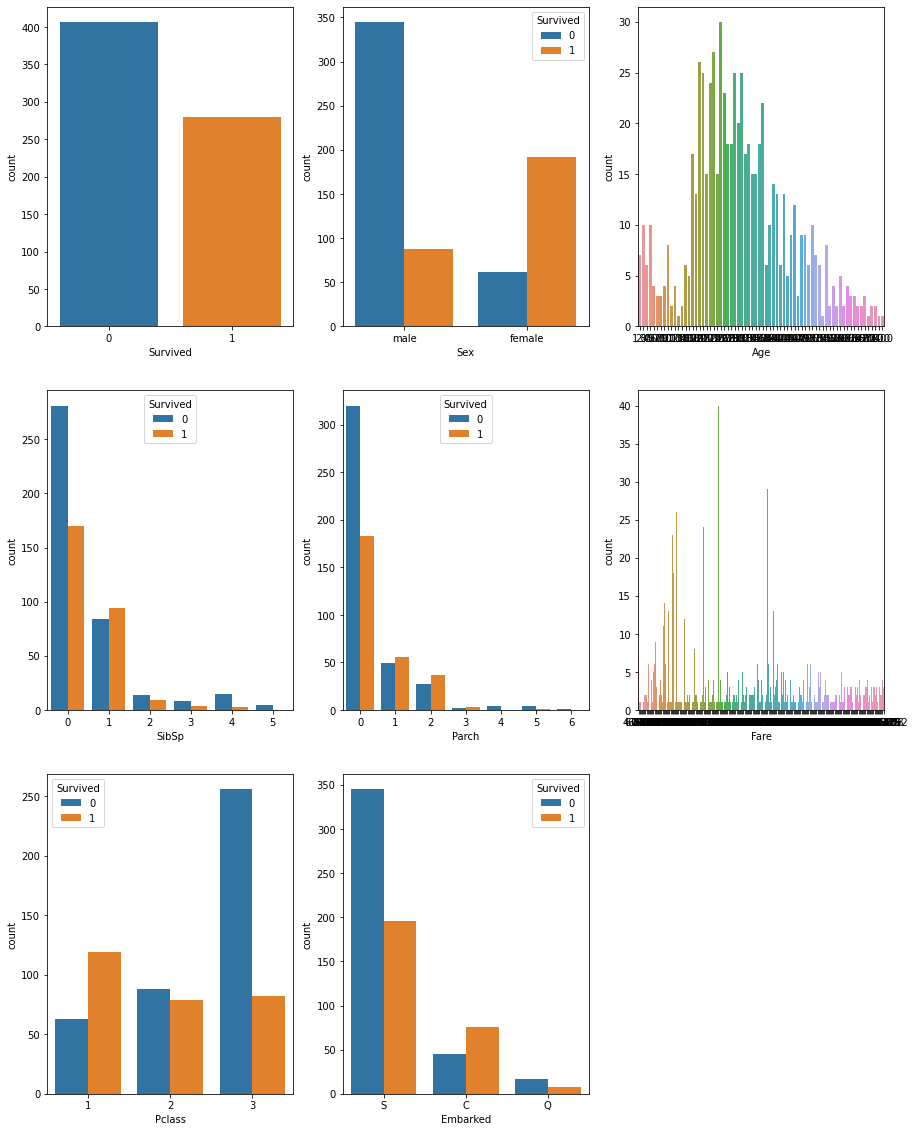

In [156]:
import seaborn as sns
plt.figure(figsize=(15,20))

plt.subplot(3,3,1)
sns.countplot(data=train, x='Survived')
plt.subplot(3,3,2)
sns.countplot(data=train, x='Sex', hue="Survived")
plt.subplot(3,3,3)
sns.countplot(data=train, x='Age')
plt.subplot(3,3,4)
sns.countplot(data=train, x='SibSp', hue="Survived")
plt.subplot(3,3,5)
sns.countplot(data=train, x='Parch', hue="Survived")
plt.subplot(3,3,6)
sns.countplot(data=train, x='Fare')

plt.subplot(3,3,7)
sns.countplot(data=train, x='Pclass', hue="Survived")  # 오브젝트 시 범주별로 분류
plt.subplot(3,3,8)
sns.countplot(data=train, x='Embarked', hue="Survived") # 오브젝트 시 범주별로 분류



# 고루 분포해있는편

* 눈에 띄는 요소는 성별/티켓 클래스/항구별 다른 분포를 보인다는 점이다.
    * 예를 들면 남자는 죽은 사람이 많은 반면 여자는 생존한 사람이 많고,
    * 티켓클래스가 1클래스의 사람은 생존한 사람이 많은 반면, 3클래스의 사람은 죽은 사람이 월등히 많다.
    * 항구별로도 C항구의 입항자가 살아난 경우가 많다.

* 동승자가 없을 때 더 많이 죽은 걸로 보이기 때문에
    * SibSp와 Parch는 합산하여 0과 이외로 동승 여부의 이진 분류로만 쓰고자 한다.

In [149]:
train["With"] = train['SibSp'] + train['Parch'] 
x_test["With"] = x_test['SibSp'] + x_test['Parch'] 

train["With"] = train["With"].apply(lambda x : 1 if x > 0 else 0)
x_test["With"] = x_test["With"].apply(lambda x : 1 if x > 0 else 0)

* 실제로 혼자온 사람이 죽은 비율이 높은 것을 알 수 있다

<AxesSubplot:xlabel='With', ylabel='count'>

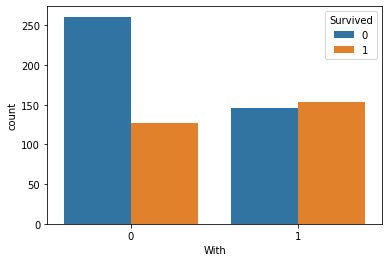

In [153]:
sns.countplot(data=train, x='With', hue="Survived")

* 써야할 변수 선정
    * Sex / String / 이진 분류
    * Age / int 
    * Fare / int
    * PClass / String / 다중 클래스 분류
    * Embarked / String / 다중 클래스 분류
    * With(파생변수) / String / 이진 분류

In [225]:
# 원핫 인코딩
multi = ["Pclass", "Embarked"]
train_mult = train[multi].copy()
train_mult["Pclass"] = train_mult["Pclass"].astype("object")
train_mult = pd.get_dummies(train_mult)
train_mult.reset_index(inplace=True)

x_test_mult = x_test[multi].copy()
x_test_mult["Pclass"] = x_test_mult["Pclass"].astype("object")
x_test_mult = pd.get_dummies(x_test_mult)
x_test_mult.reset_index(inplace=True)

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_sex = le.fit_transform(train["Sex"])
x_test_sex = le.fit_transform(x_test["Sex"])

train_sex = pd.DataFrame(data=train_sex, columns=["Sex"])
x_test_sex = pd.DataFrame(data=x_test_sex, columns=["Sex"])

# 필요없음
other = ["Age", "Fare", "With"]
train_else = train[other].copy()
x_test_else = x_test[other].copy()

train_else.reset_index(inplace=True)
x_test_else.reset_index(inplace=True)

x_train = pd.concat([train_mult, train_sex, train_else], axis=1)
x_test_real = pd.concat([x_test_mult, x_test_sex, x_test_else], axis=1)
y_train = train[["PassengerId", "Survived"]].copy()
y_train.reset_index(inplace=True)

In [226]:
x_train.shape, y_train.shape, x_test_real.shape, y_test.shape

((687, 12), (687, 3), (312, 12), (312, 2))

In [227]:
x_train.columns

Index(['index', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex', 'index', 'Age', 'Fare', 'With'],
      dtype='object')

In [228]:
x_test_real.columns

Index(['index', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex', 'index', 'Age', 'Fare', 'With'],
      dtype='object')

In [230]:
# 모델 학습

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train["Survived"])
pred = model.predict(x_test_real)
print(classification_report(y_test["Survived"], pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       188
           1       0.92      0.88      0.90       124

    accuracy                           0.92       312
   macro avg       0.92      0.92      0.92       312
weighted avg       0.92      0.92      0.92       312

